In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import * 
pd.options.display.max_columns = 1000

%matplotlib inline

In [3]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

In [4]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [5]:
28 * 28 

784

In [35]:
X_train = df_train.iloc[:, 1:].values/255
X_test = df_test.iloc[:, 1:].values/255
y_train = df_train.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values

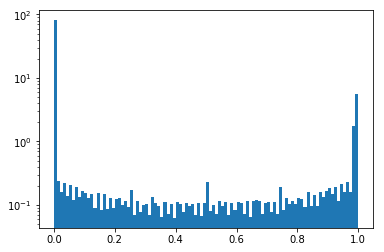

In [36]:
plt.hist(X_train.flatten(), normed=True, bins = 100, log=True);

In [37]:
X_train[0].reshape(28, 28).shape

(28, 28)

Text(0.5,1,'5')

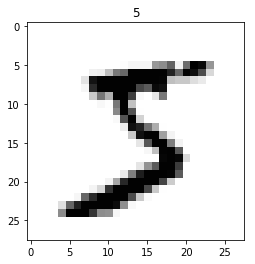

In [38]:
plt.imshow(X_train[0].reshape(28, 28), cmap="Greys")
plt.title(y_train[0])

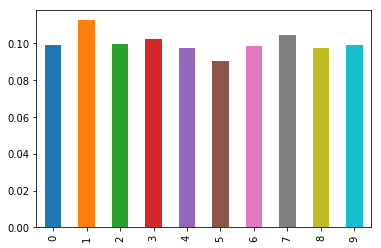

In [39]:
(pd.Series(y_train).value_counts()/len(y_train)).sort_index().plot.bar()

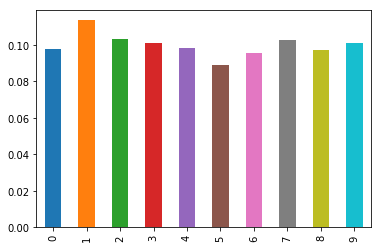

In [40]:
(pd.Series(y_test).value_counts()/len(y_test)).sort_index().plot.bar()

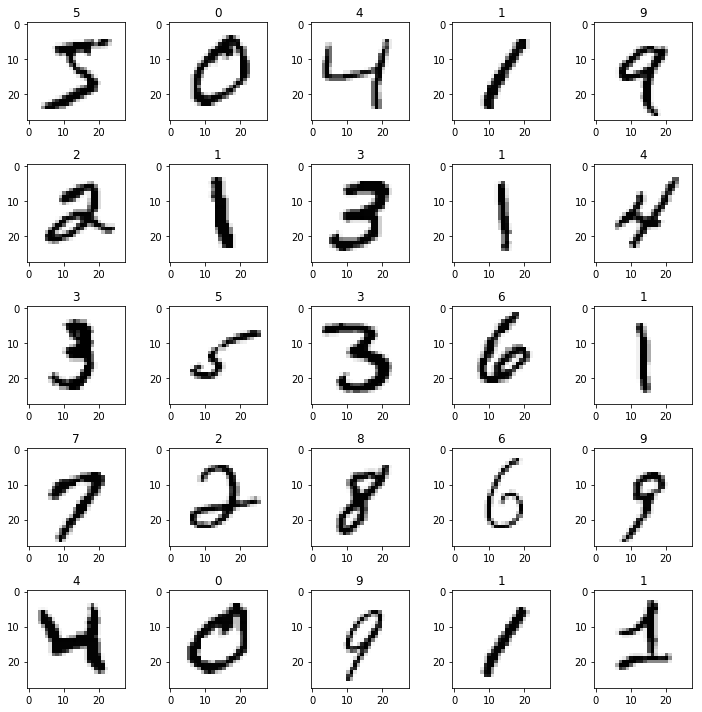

In [41]:
fig, _ = plt.subplots(5, 5, figsize = (10, 10))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap="Greys")
    ax.set_title(y_train[i])

plt.tight_layout()

In [52]:
%%time 
est = linear_model.SGDClassifier(alpha=0.01, 
                                 max_iter=100, 
                                 learning_rate = "invscaling", 
                                 eta0 = 0.2,
                                 tol = 1e-6,
                                 n_jobs = 4
                                )
est.fit(X_train, y_train)
print("Training accuracy: ", est.score(X_train, y_train), 
      "Testing accuracy: ", est.score(X_test, y_test), 
      "iterations", est.n_iter_)

Training accuracy:  0.9024833333333333 Testing accuracy:  0.908 iterations 14
CPU times: user 10.8 s, sys: 211 ms, total: 11 s
Wall time: 3.96 s


In [47]:
est.n_iter_

17

In [53]:
y_test_pred = est.predict(X_test)

In [55]:
res = pd.DataFrame({"actual": y_test, "predicted": y_test_pred})
res["match"] = res.actual == res.predicted
res.sample(10)

,actual,predicted,match
8133,6,6,True
9151,7,7,True
9039,1,1,True
4461,5,5,True
8027,8,8,True
2643,6,6,True
7814,8,8,True
4214,7,7,True
8132,5,5,True
6177,3,3,True


In [64]:
res_agg = res.groupby(["actual", "match"]).count().unstack()
res_agg

predicted      
match      False True 
actual                
0             13   967
1             27  1108
2            127   905
3            105   905
4             80   902
5            141   751
6             43   915
7             86   942
8            152   822
9            146   863

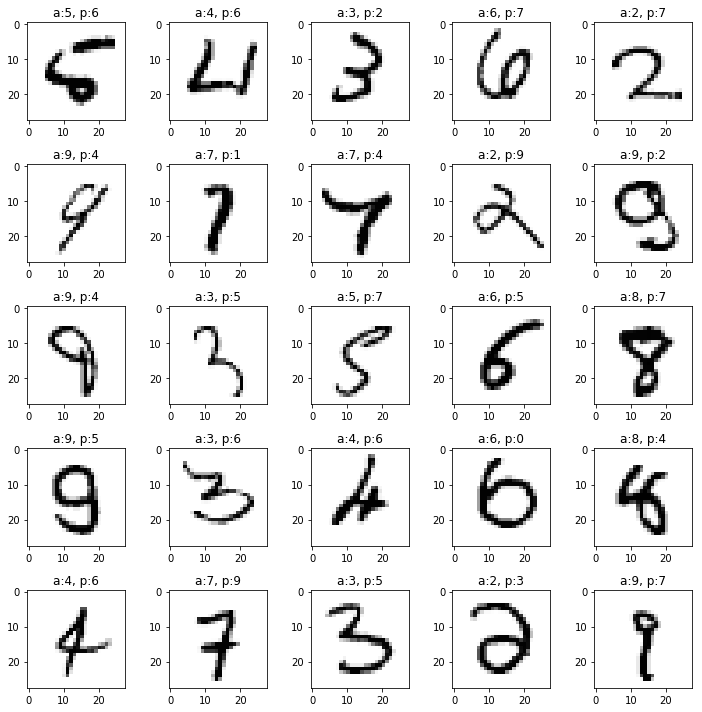

In [70]:
fig, _ = plt.subplots(5, 5, figsize = (10, 10))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[~res.match][i].reshape(28, 28), cmap="Greys")
    ax.set_title("a:" + str(y_test[~res.match][i]) + ", p:" + str(y_test_pred[~res.match][i]))
    

plt.tight_layout()

In [72]:
est.coef_.shape

(10, 784)

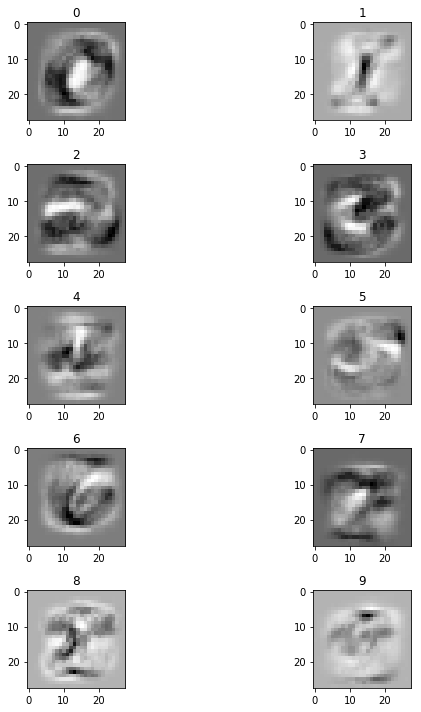

In [73]:
fig, _ = plt.subplots(5, 2, figsize = (10, 10))
for i, ax in enumerate(fig.axes):
    ax.imshow(est.coef_[i, :].reshape(28, 28), cmap="Greys")
    ax.set_title(i)

plt.tight_layout()

In [74]:
est.coef_[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -5.35607619e-05, -1.05339358e-03, -1.37767762e-03,
       -1.15726791e-03,  5.15063500e-04, -6.65978789e-05, -3.76254466e-04,
       -2.35791263e-04,  1.97136528e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  